# Download and View Training Images

This notebook shows you how to download and view the set of images used in this project. There are 14 different "images" of an alluvial fan in Eberswalde crater on Mars, taken by different spacecraft. Images is in quotes because some of the data are black and white images, some are IR images, some are digital elevation maps (DEMs), and some are slope maps.

### Import important libraries and set your working directory

In [25]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import os
import gdown
import zipfile
import shutil

# Path to your working directory to store the images
dir_path = "/Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/" # This is an example, change it to your own path


### Download the training images

The images are stored on google drive, under my (Trent's) account. Here is a link where you can download them directly, which is probably easier:

https://drive.google.com/file/d/1Mse0uh8aKa80p-kfnnPI8EAYHUVTvOtp/view?usp=share_link

Alternatively, here is some code that downloads it automatically:

In [26]:
# Define the Google Drive file URL
file_url = 'https://drive.google.com/uc?id=1Mse0uh8aKa80p-kfnnPI8EAYHUVTvOtp'

# Define the local path to save the downloaded zip file
zip_file_path = os.path.join(dir_path, 'images.zip')

# Download the zip file
gdown.download(file_url, zip_file_path, quiet=False)

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dir_path)

# Delete the zip file after extraction
os.remove(zip_file_path)

# Delete the __MACOSX folder if it exists
macosx_folder = os.path.join(dir_path, '__MACOSX')
if os.path.exists(macosx_folder):
    shutil.rmtree(macosx_folder)

print("File downloaded and extracted successfully.")

Downloading...
From (original): https://drive.google.com/uc?id=1Mse0uh8aKa80p-kfnnPI8EAYHUVTvOtp
From (redirected): https://drive.google.com/uc?id=1Mse0uh8aKa80p-kfnnPI8EAYHUVTvOtp&confirm=t&uuid=fb57e397-f6d6-4888-932e-bf717c57b036
To: /Users/tthomas/Desktop/ESS569/MLGEO2024_MarsFans/images.zip
100%|██████████| 35.3M/35.3M [00:00<00:00, 38.2MB/s]


File downloaded and extracted successfully.


### Load in the training images to view and analyze

In [28]:
img_path = dir_path + "training_images/"

blendDEM = rxr.open_rasterio(img_path + "blendDEM.tif", cache=False)
blendSLOPE = rxr.open_rasterio(img_path + "blendSLOPE.tif", cache=False)

ctxDEM = rxr.open_rasterio(img_path + "ctxDEM.tif", cache=False)
ctxIMG = rxr.open_rasterio(img_path + "ctxIMG.tif", cache=False)
ctxSLOPE = rxr.open_rasterio(img_path + "ctxSLOPE.tif", cache=False)

dayIR = rxr.open_rasterio(img_path + "dayIR.tif", cache=False)
nightIR = rxr.open_rasterio(img_path + "nightIR.tif", cache=False)

hrscND = rxr.open_rasterio(img_path + "hrscND.tif", cache=False)
hrscP1 = rxr.open_rasterio(img_path + "hrscP1.tif", cache=False)
hrscP2 = rxr.open_rasterio(img_path + "hrscP2.tif", cache=False)
hrscS1 = rxr.open_rasterio(img_path + "hrscS1.tif", cache=False)
hrscS2 = rxr.open_rasterio(img_path + "hrscS2.tif", cache=False)

training_imgs = [blendDEM, blendSLOPE, ctxDEM, ctxIMG, ctxSLOPE, dayIR, nightIR, hrscND, hrscP1, hrscP2, hrscS1, hrscS2]
training_names = ['blendDEM', 'blendSLOPE', 'ctxDEM', 'ctxIMG', 'ctxSLOPE', 'dayIR', 'nightIR', 'hrscND', 'hrscP1', 'hrscP2', 'hrscS1', 'hrscS2']


### Plot the training images

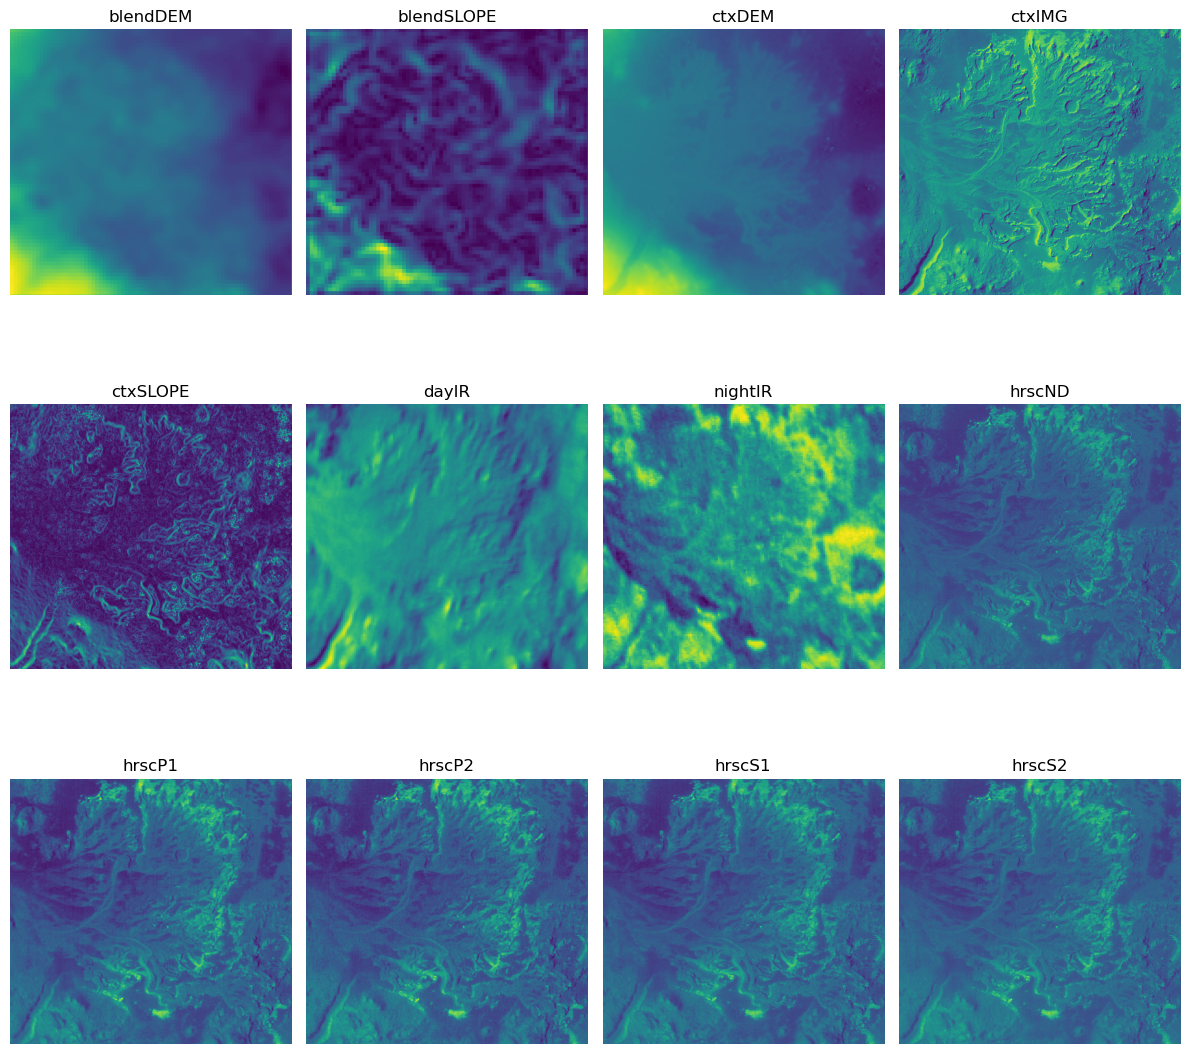

In [29]:
# Set the number of images per row
n_cols = 4
n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the training images and plot them
for i, ax in enumerate(axes.flat):
    if i < len(training_imgs):
        img = training_imgs[i].squeeze()  # Remove extra dimensions if present
        ax.imshow(img, cmap='viridis')  # You can choose a different colormap if desired
        ax.set_title(training_names[i])
        ax.axis('off')  # Turn off the axes
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()

### Plot images with the validation map overlayed

This shows if the images are aligned and can be sensibly compared to our label data (i.e. the validation map). All images were previously processed and reprojected to match the coordinates and resolution of the CTX image. There seems to be a problem with the THEMIS dayIR image - you can see how the crater doesn't align well with the yellow section in the valiation map.

In [4]:
val_map = rxr.open_rasterio(img_path + "validation_map.tif", cache=False)

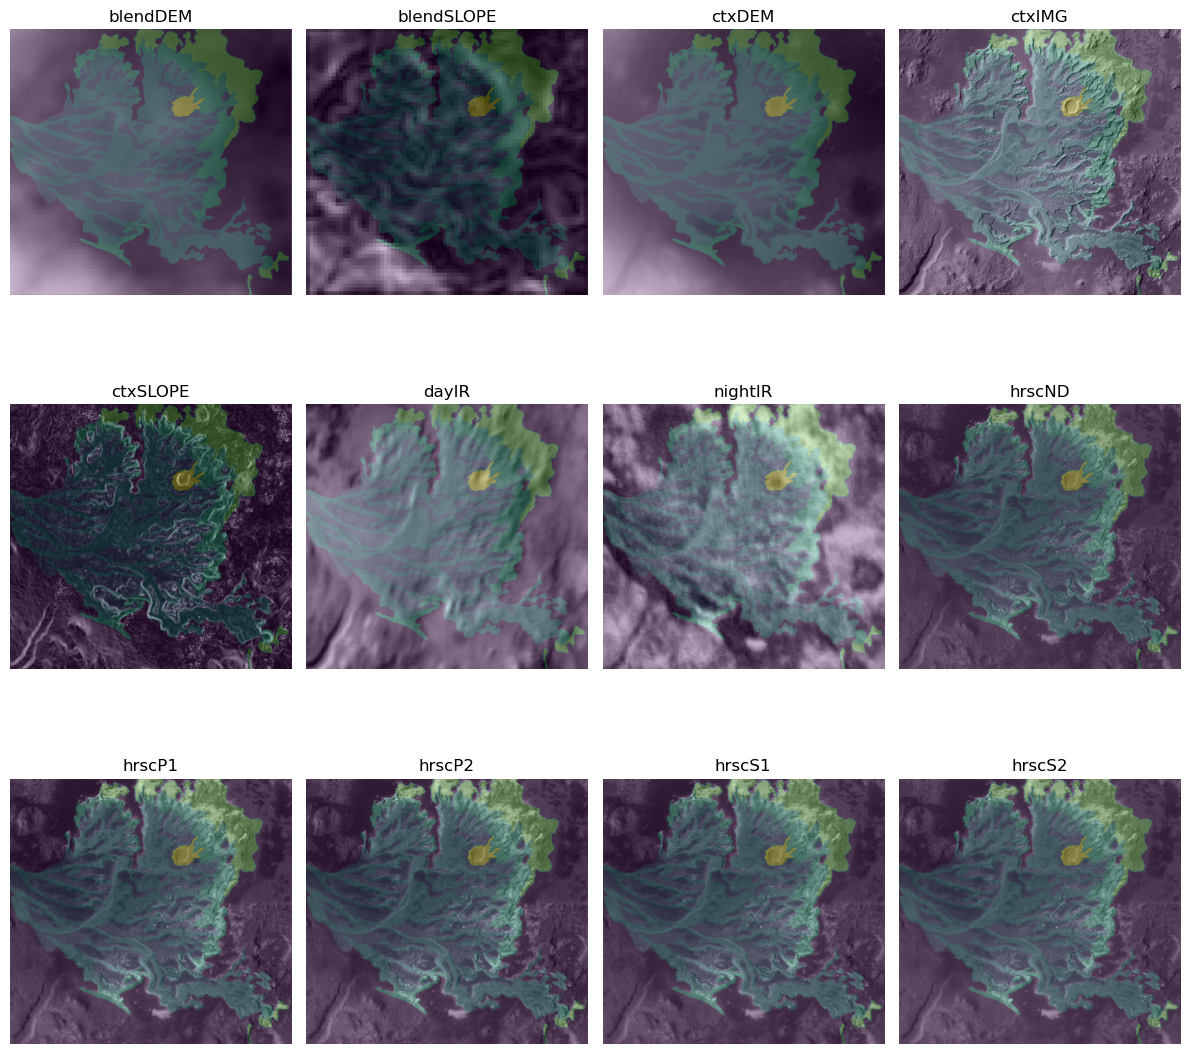

In [9]:
# Set the number of images per row
n_cols = 4
n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the training images and plot them
for i, ax in enumerate(axes.flat):
    if i < len(training_imgs):
        img = training_imgs[i].squeeze()  # Remove extra dimensions if present
        ax.imshow(img, cmap='gray')  # Underlying image in grayscale
        
        # Overlay val_map with viridis colormap and semi-transparency
        ax.imshow(val_map.squeeze(), cmap='viridis', alpha=0.3)

        ax.set_title(training_names[i])  # Title corresponding to the variable name
        ax.axis('off')  # Turn off the axes
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()

### Plot histograms of pixel values

Here we see that all of the images have been normalized so that their pixel values are between 0 and 1. This makes it straightforward to compare patterns between different images

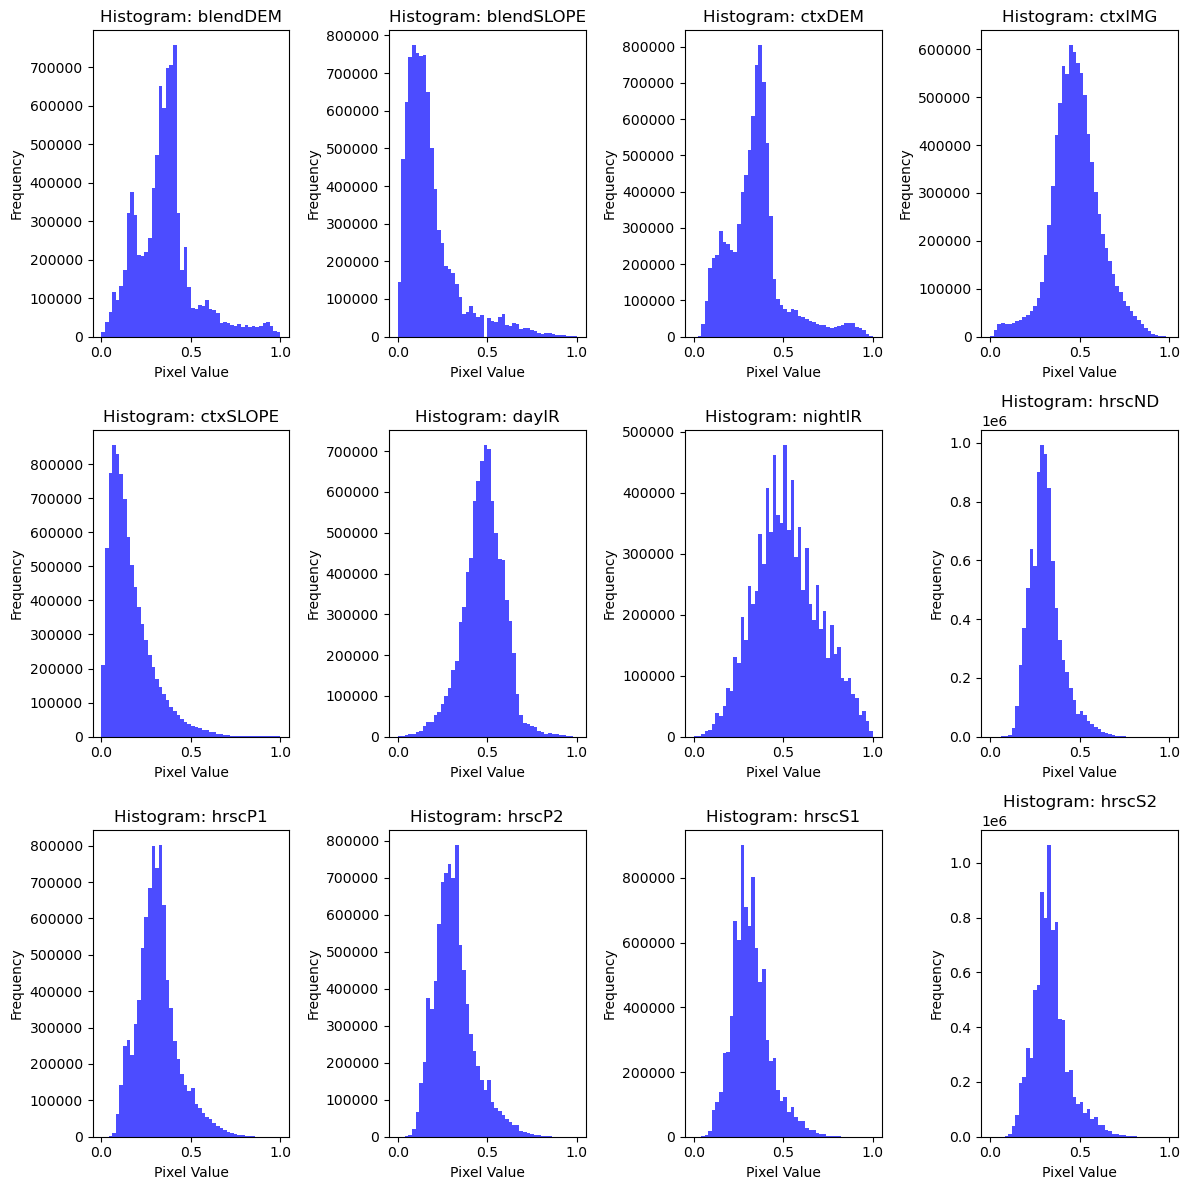

In [32]:
# Set the number of images per row
n_cols = 4
n_rows = len(training_imgs) // n_cols + int(len(training_imgs) % n_cols > 0)

# Create a figure with subplots for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Loop through the training images and plot their histograms
for i, ax in enumerate(axes.flat):
    if i < len(training_imgs):
        img = training_imgs[i].squeeze().values.flatten()  # Flatten the pixel values to 1D
        ax.hist(img, bins=50, color='blue', alpha=0.7)  # Create the histogram with 50 bins
        ax.set_title(training_names[i])
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off')  # Turn off any unused subplots

plt.tight_layout()
plt.show()


In [ ]:
# Marine suggests using Standard Scaling Normalization to normalize the data
# This will scale the data to have a mean of 0 and a standard deviation of 1, making the distributions more comparable